The dataset we are using is the completed flat price from 2017 to 2023. With the ever increasing issue of housing prices, it is important to understand what affects the price of a flat in the first place. Resale flats in particular are popular as they are older and larger than newer built flats. 

We want to find out which aspects of a flat has the effect on its price and how good is it at determining the resale price. 

Our hypothesis is that the resale price of a flat largely depends on the floor area of a flat, the lease length of the flat and the storey range of the flat. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
sb.set()

In [2]:
df = pd.read_csv("completed_flat_price_2017_2023.csv")
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,Longitude,Latitude
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10 Singapore,103.856785,1.369941
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,108 ANG MO KIO AVE 4 Singapore,103.839917,1.379242
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,602 ANG MO KIO AVE 5 Singapore,103.835425,1.380760
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,465 ANG MO KIO AVE 10 Singapore,103.857175,1.366223
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,601 ANG MO KIO AVE 5 Singapore,103.835076,1.380987


In [3]:
print(df.dtypes)

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease         object
resale_price           float64
full_address            object
Longitude              float64
Latitude               float64
dtype: object


In [4]:
#Filter None release dates
df = df[(df['month']!='None')]

#Converting date type to datetime
df['month'] = pd.to_datetime(df['month'], errors = 'coerce')

#Only data that is before 2023 is taken
df = df[~(df['month'] > '2023-01-01')]

#Filtering unusable data such as nonexistant dates
df = df[(df['month'].dt.day != 0)] 
df = df[(df['month'].dt.month != 0)]
df = df.query('month != "NaT"')

Lets look at the categorical data against price in a barplot

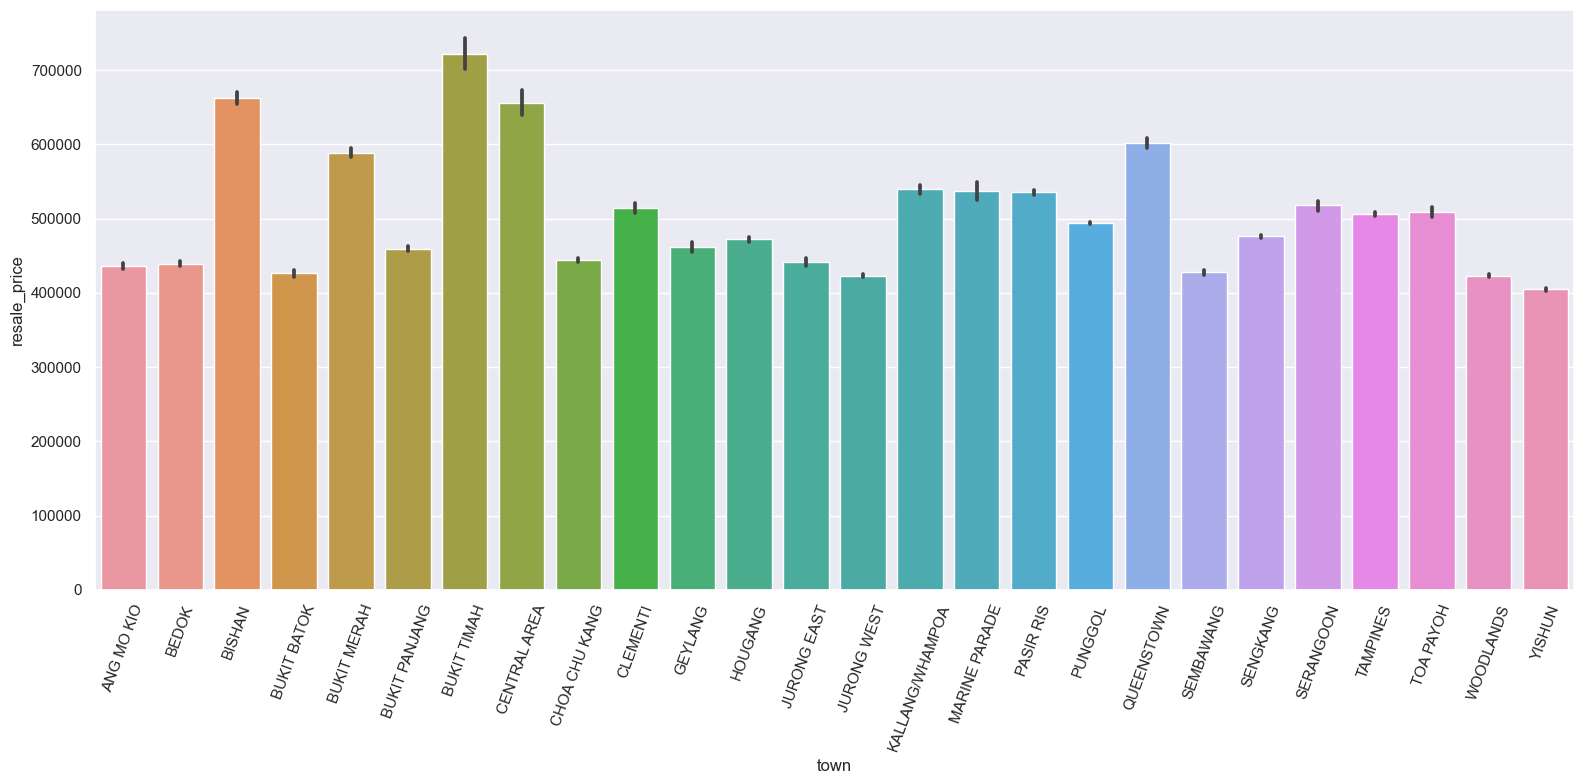

In [5]:
f = plt.figure(figsize=(16, 8))
sb.barplot(data = df, x = 'town', y = 'resale_price')
plt.xticks(rotation = 70)
plt.tight_layout()

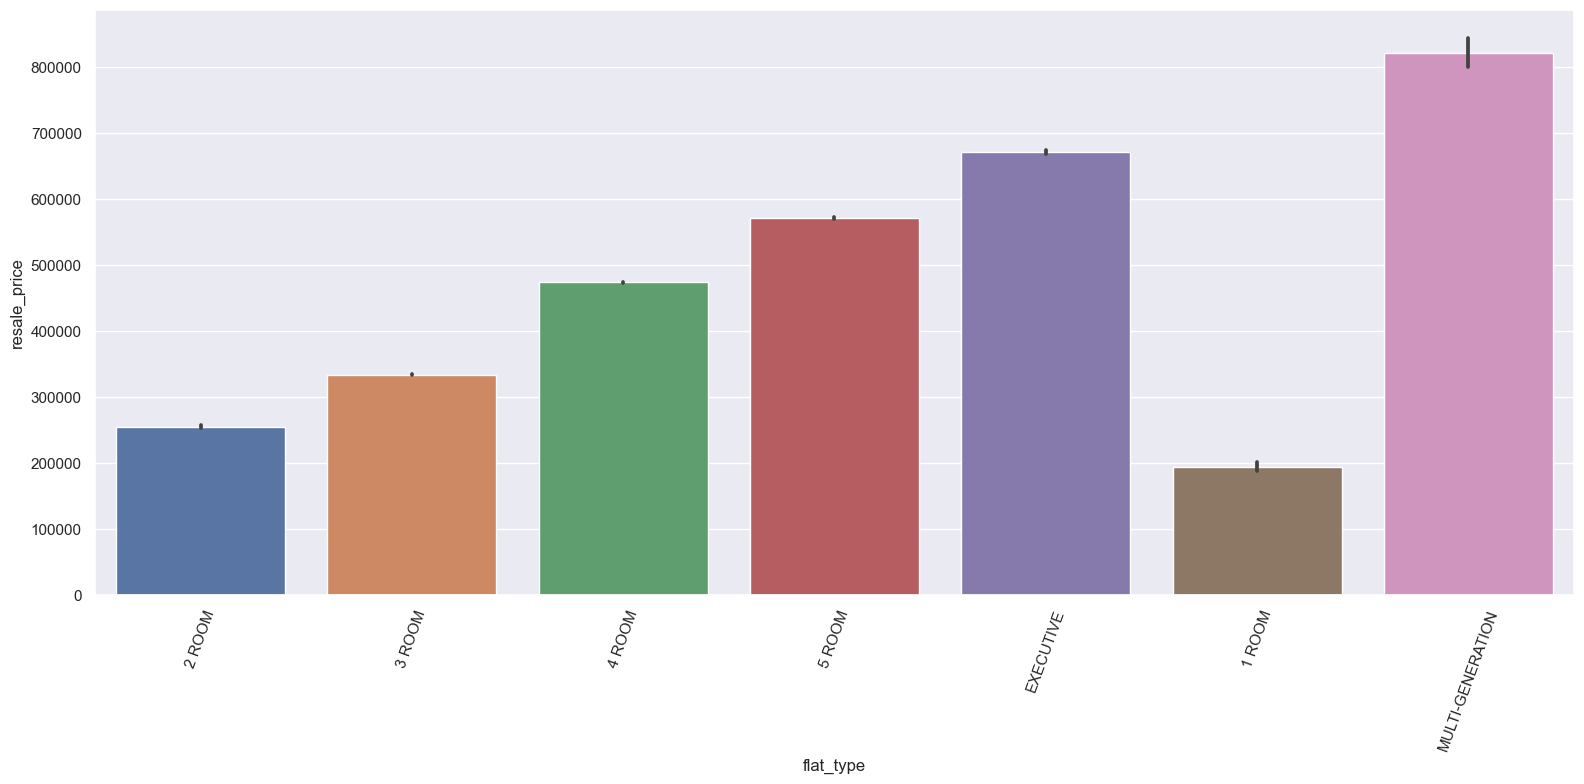

In [6]:
f = plt.figure(figsize=(16, 8))
sb.barplot(data = df, x = 'flat_type', y = 'resale_price')
plt.xticks(rotation = 70)
plt.tight_layout()

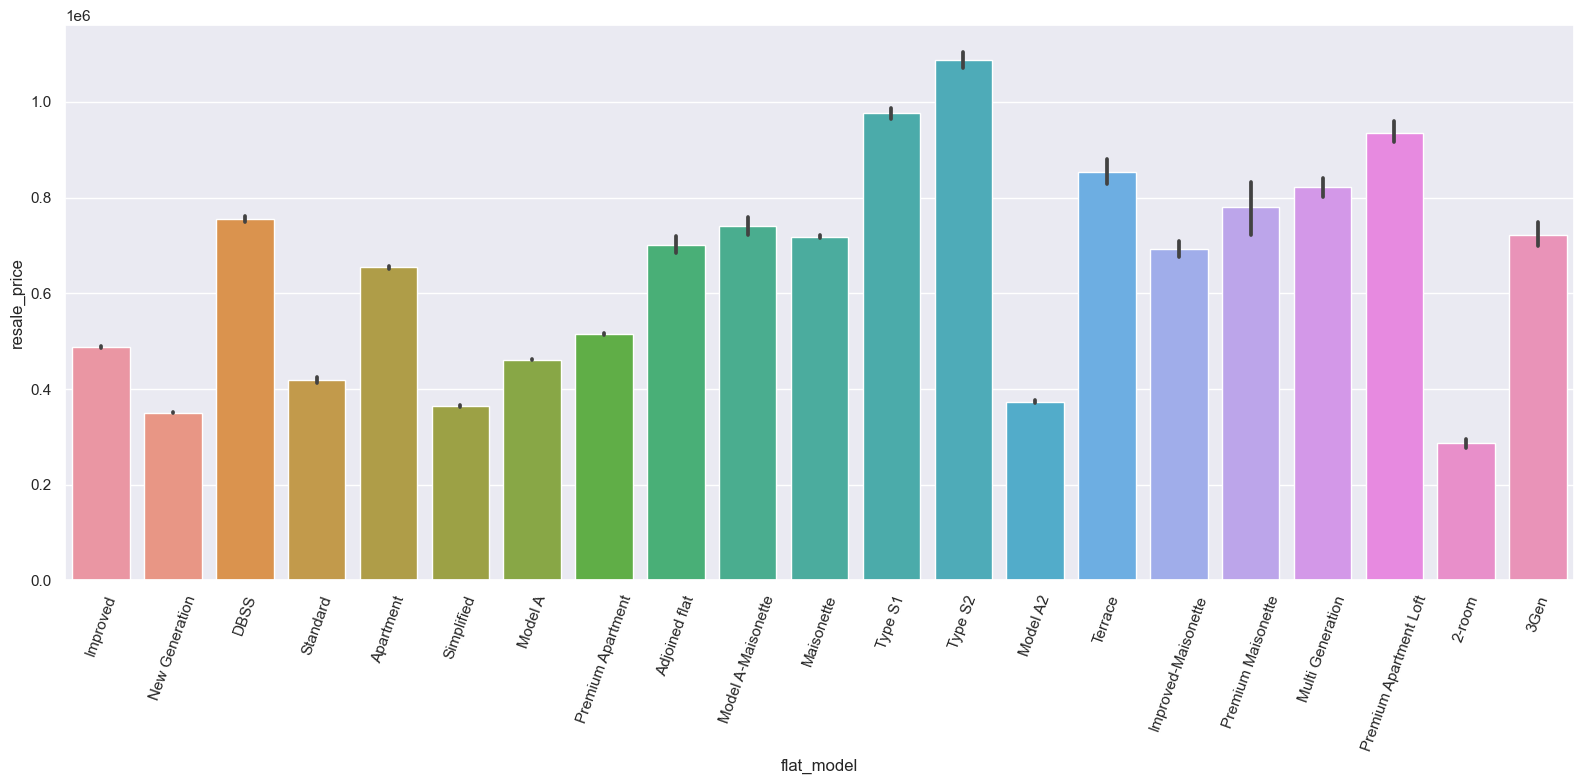

In [7]:
f = plt.figure(figsize=(16, 8))
sb.barplot(data = df, x = 'flat_model', y = 'resale_price')
plt.xticks(rotation = 70)
plt.tight_layout()

From here i think we look to compare resale_price to floor_area_sqm, flat_model, storey_range, lease_commence_date 
and remaining_lease and year possibly

In [8]:
#Very crude conversion to int for storey range
def convertStory(string):
    if string == '01 TO 03':
        return 1
    if string == '04 TO 06':
        return 2
    if string == '07 TO 09':
        return 3
    if string == '10 TO 12':
        return 4
    if string == '13 TO 15':
        return 5
    if string == '16 TO 18':
        return 6
    if string == '19 TO 21':
        return 7
    if string == '22 TO 24':
        return 8
    if string == '25 TO 27':
        return 9
    if string == '28 TO 30':
        return 10
    if string == '31 TO 33':
        return 11
    if string == '34 TO 36':
        return 12
    if string == '37 TO 39':
        return 13
    if string == '40 TO 42':
        return 14
    if string == '43 TO 45':
        return 15
    if string == '46 TO 48':
        return 16
    if string == '49 TO 51':
        return 17
    else:
        return 0
    return 0

story = pd.DataFrame(df['storey_range'].apply(convertStory))
story.columns = ['storey_range_update']
story.describe()

,storey_range_update
count,145975.000000
mean,3.251454
std,1.981559
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,17.000000


<AxesSubplot:ylabel='Count'>

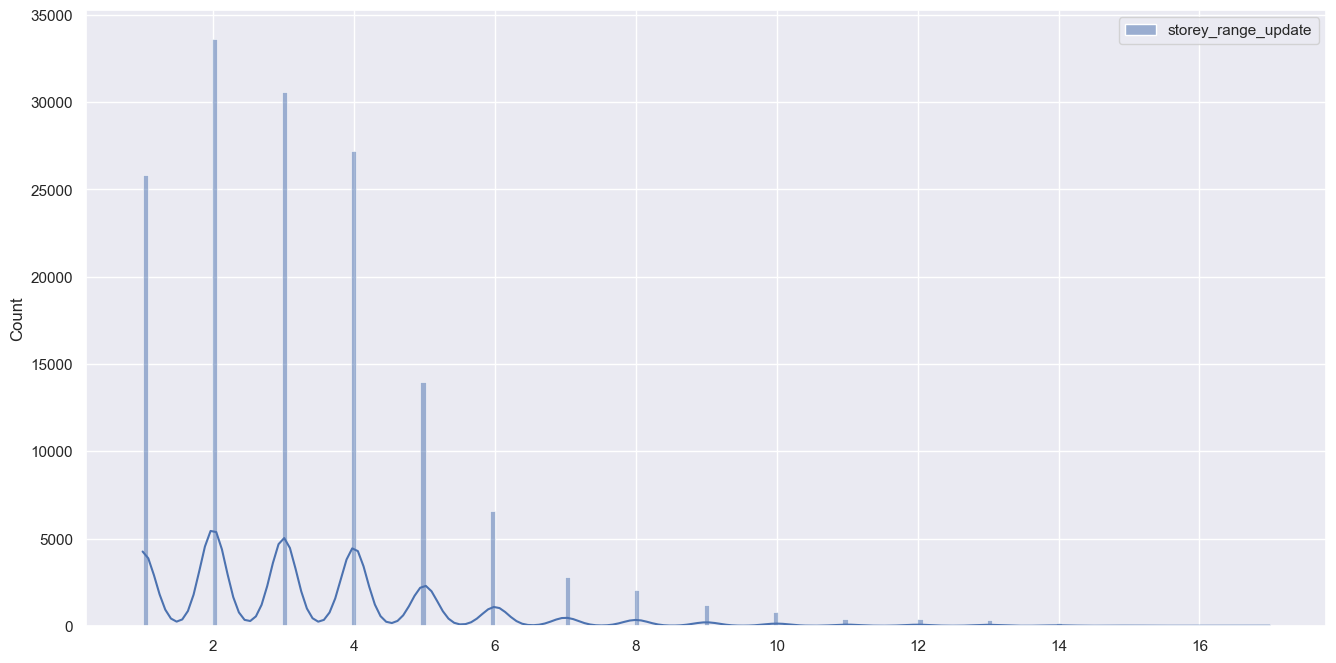

In [9]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = story,kde = True)

In [10]:
#Age of flat can be determined by date sold - lease of flat. 
ageFlat = pd.DataFrame(df['month'].dt.year - df['lease_commence_date'])
ageFlat.columns = ['age']
display(ageFlat)

,age
0,38
1,39
2,37
3,37
4,37
...,...
145970,35
145971,35
145972,35
145973,37


<AxesSubplot:ylabel='Count'>

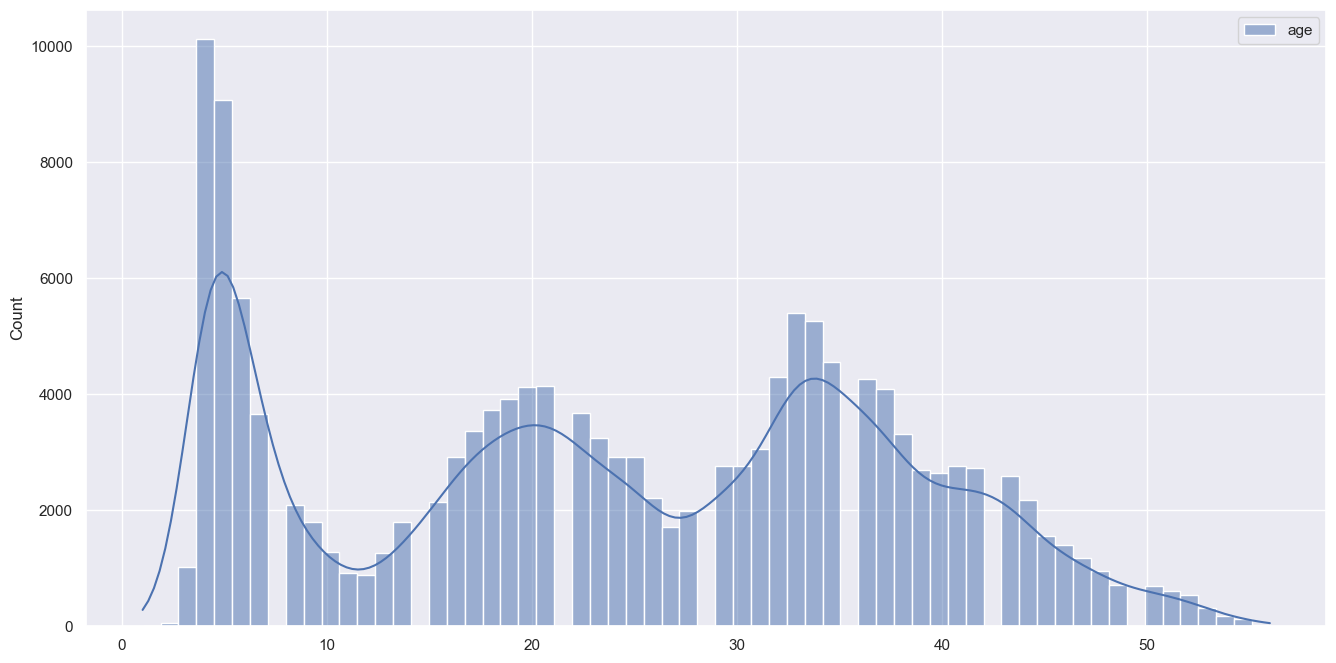

In [11]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = ageFlat, kde = True)

In [12]:
df['resale_price'].describe()

count    1.459750e+05
mean     4.778905e+05
std      1.654395e+05
min      1.400000e+05
25%      3.570000e+05
50%      4.480000e+05
75%      5.650000e+05
max      1.418000e+06
Name: resale_price, dtype: float64

<AxesSubplot:xlabel='resale_price', ylabel='Count'>

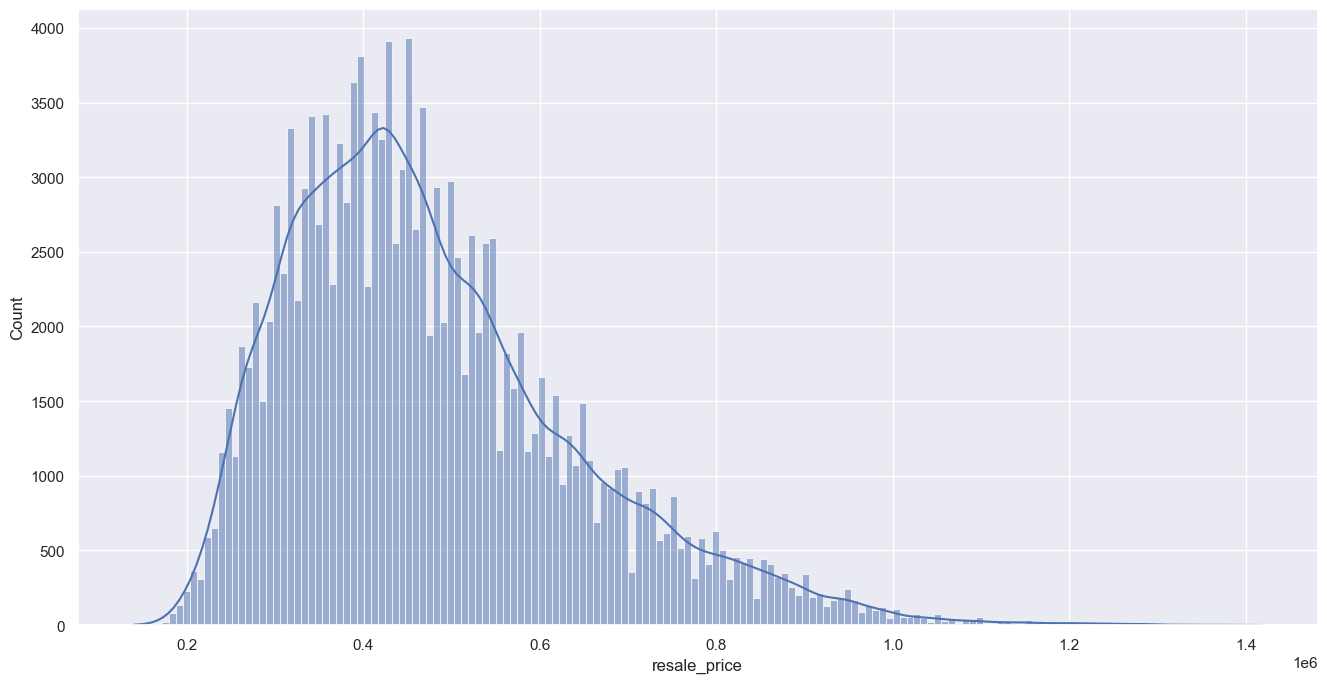

In [13]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = df['resale_price'], kde = True)

In [14]:
#Log of price gives less skew data
logPrice = pd.DataFrame(np.log2(df['resale_price']))
logPrice.describe()

,resale_price
count,145975.000000
mean,18.785144
std,0.481472
min,17.095067
25%,18.445565
50%,18.773139
75%,19.107891
max,20.435426


In [15]:
logPrice.columns = ['logPrice']
display(logPrice)

,logPrice
0,17.823765
1,17.931569
2,17.999207
3,18.015633
4,18.015633
...,...
145970,19.526117
145971,19.554499
145972,19.516531
145973,19.573115


<AxesSubplot:ylabel='Count'>

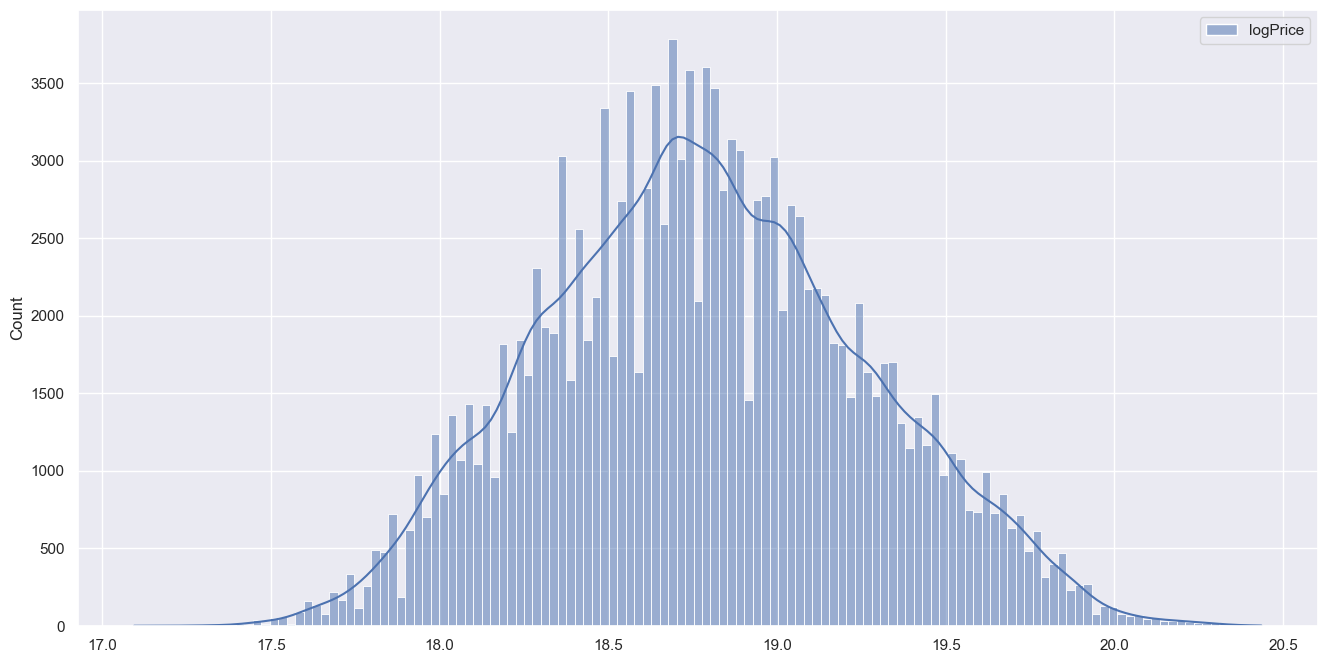

In [16]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = logPrice, kde = True)

Intercept of Regression 	: b =  [66555.94959946]
Coefficients of Regression 	: a =  [[4213.28407951]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.37598735933865524
Mean Squared Error (MSE) 	: 17035273062.822481

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.37386488656319206
Mean Squared Error (MSE) 	: 17313828796.43337



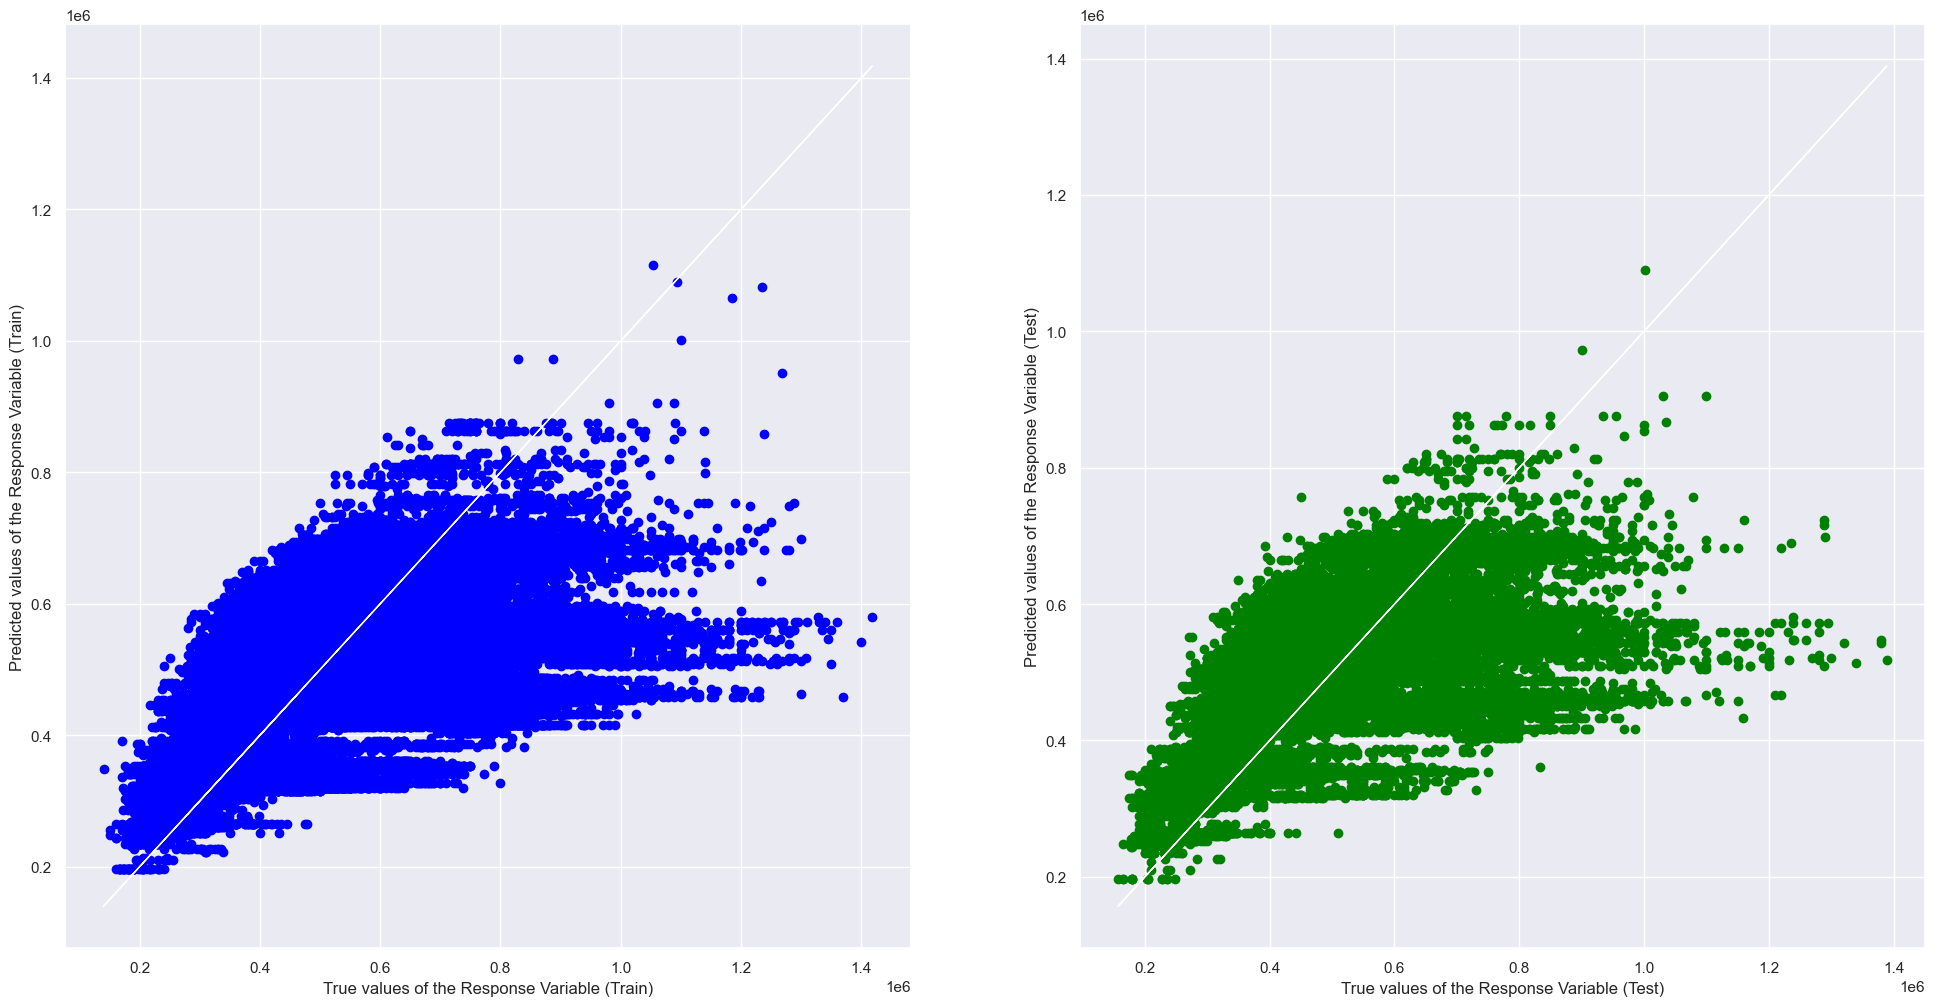

In [17]:
#The Regression of the OG resale_price against floor_area_sqm
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# price against floor_area_sqm
price = pd.DataFrame(df['resale_price'])   # Response
floor_area_sqm = pd.DataFrame(df['floor_area_sqm'])         # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(floor_area_sqm, price, test_size = 0.2)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

Intercept of Regression 	: b =  [17.49011818]
Coefficients of Regression 	: a =  [[0.01327348]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.43901247367292784
Mean Squared Error (MSE) 	: 0.13014344893301452

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4443789366750831
Mean Squared Error (MSE) 	: 0.12840253849393532



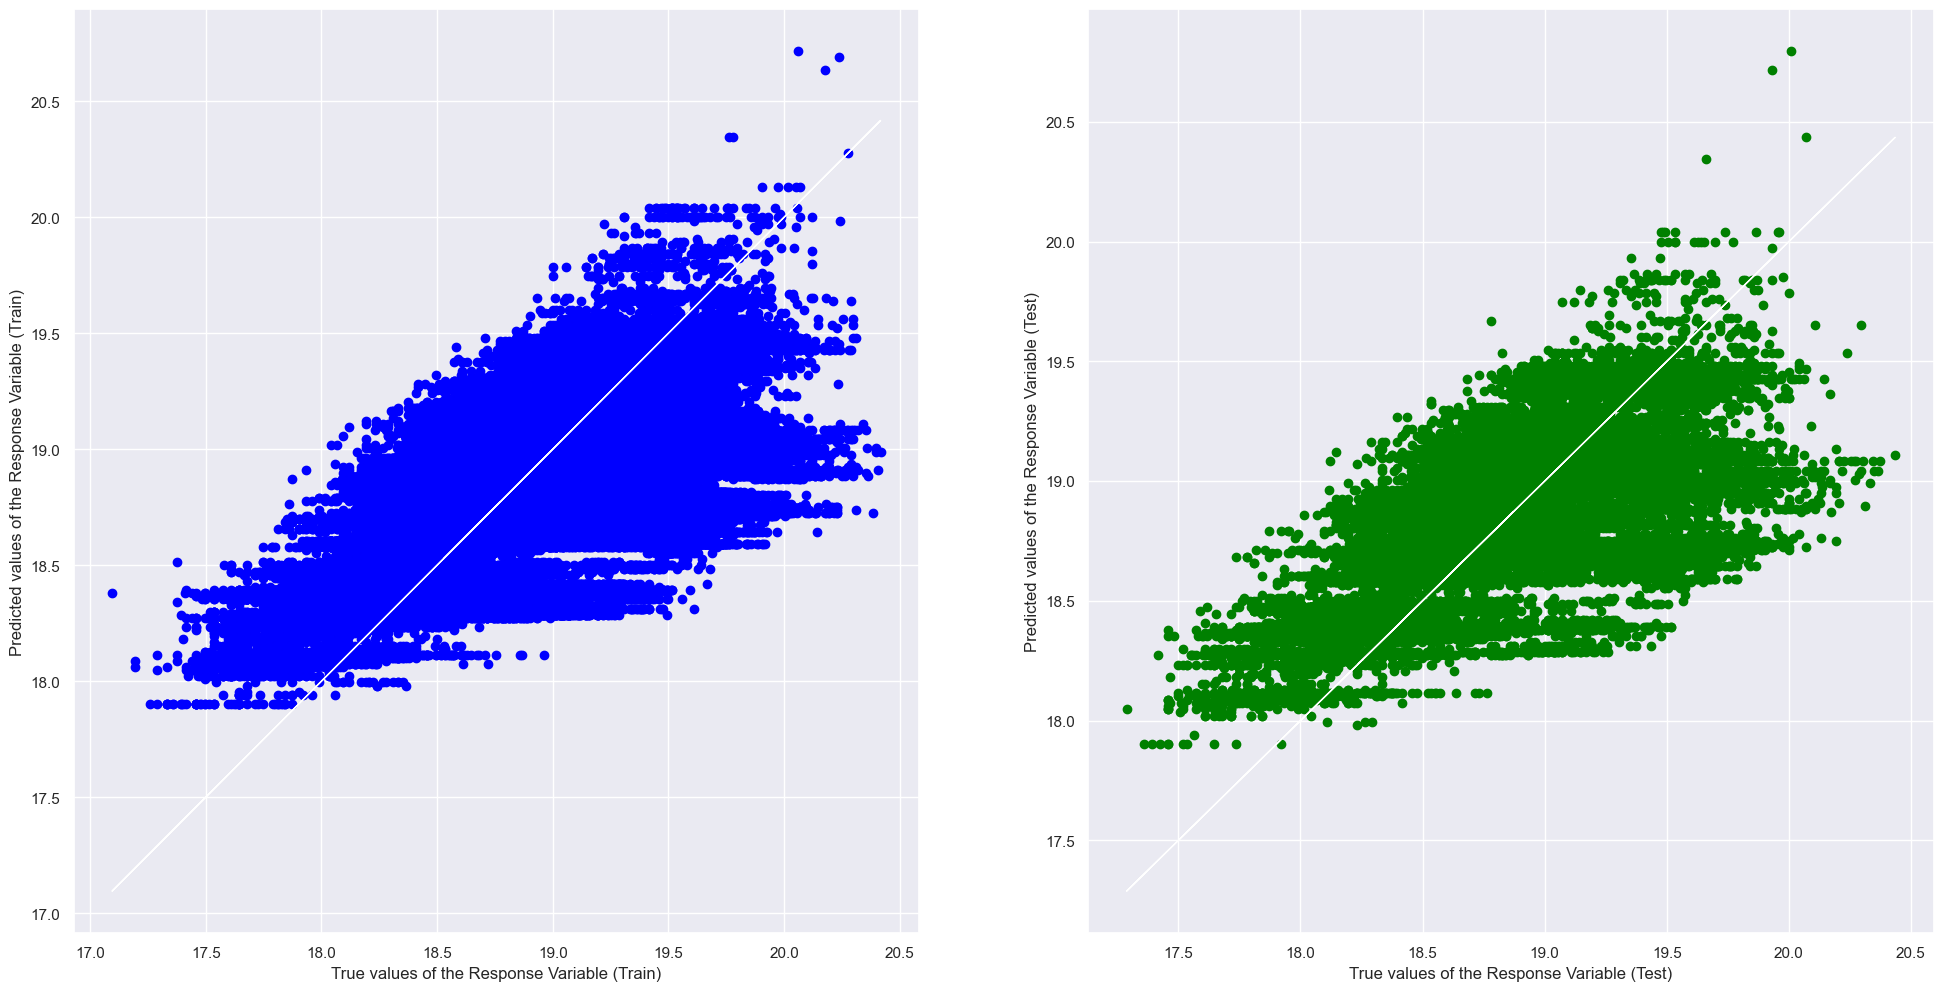

In [18]:
# Log of price against floor_area_sqm
priceLog = pd.DataFrame(logPrice)   # Response
floor_area_sqm = pd.DataFrame(df['floor_area_sqm'])         # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(floor_area_sqm, priceLog, test_size = 0.2)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [19]:
#Explained Variance of this logprice Model is higher so we will use it.

<AxesSubplot:>

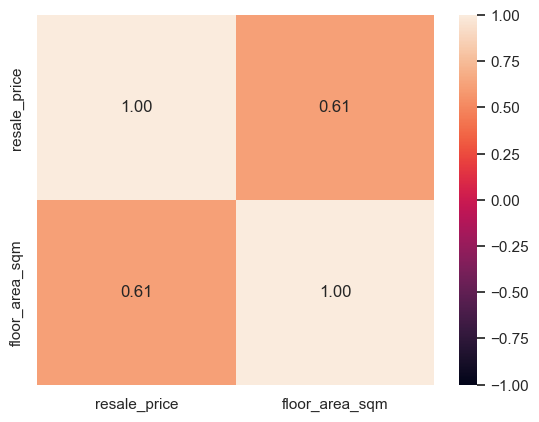

In [20]:
# Create a joint dataframe by concatenating the two variables
priceAreaDF = pd.concat([price, floor_area_sqm], axis = 1).reindex(price.index)
# Calculate the correlation between the two columns/variables
sb.heatmap(priceAreaDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

Intercept of Regression 	: b =  [19.10682581]
Coefficients of Regression 	: a =  [[-0.01326868]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.14103695731803623
Mean Squared Error (MSE) 	: 0.19889861171547557

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.13728767408646647
Mean Squared Error (MSE) 	: 0.20087567159370795



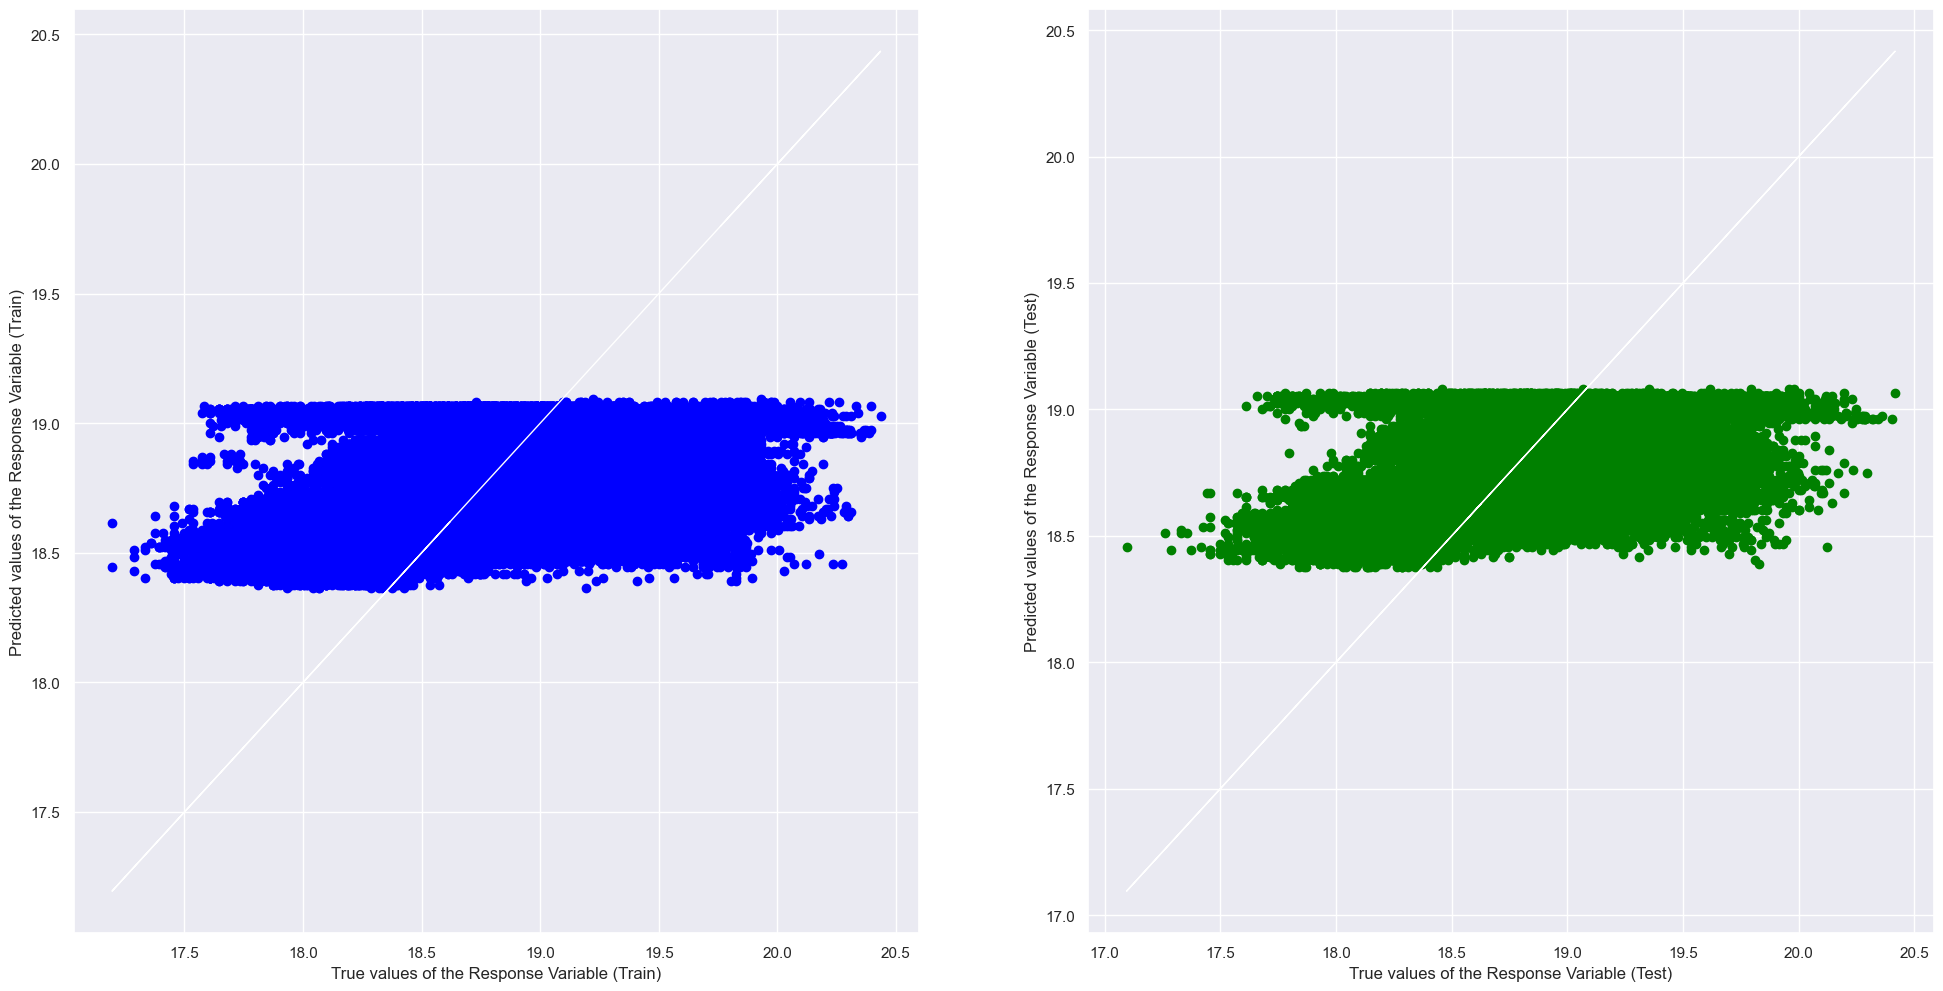

In [21]:
# Log of price against age of flat which is converted from lease commence date
price = pd.DataFrame(logPrice)   # Response
age = pd.DataFrame(ageFlat)         # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(age, price, test_size = 0.2)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

<AxesSubplot:>

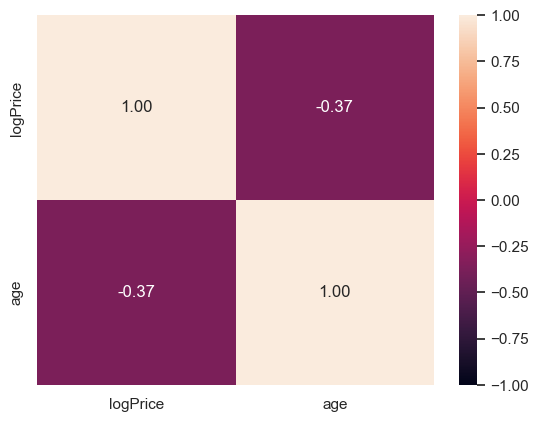

In [22]:
# Create a joint dataframe by concatenating the two variables
priceAgeDF = pd.concat([price, age], axis = 1).reindex(price.index)
# Calculate the correlation between the two columns/variables
sb.heatmap(priceAgeDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

Intercept of Regression 	: b =  [18.51724765]
Coefficients of Regression 	: a =  [[0.08238724]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.11427126668449705
Mean Squared Error (MSE) 	: 0.2054346227411375

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.1136421981502097
Mean Squared Error (MSE) 	: 0.20502818863244535



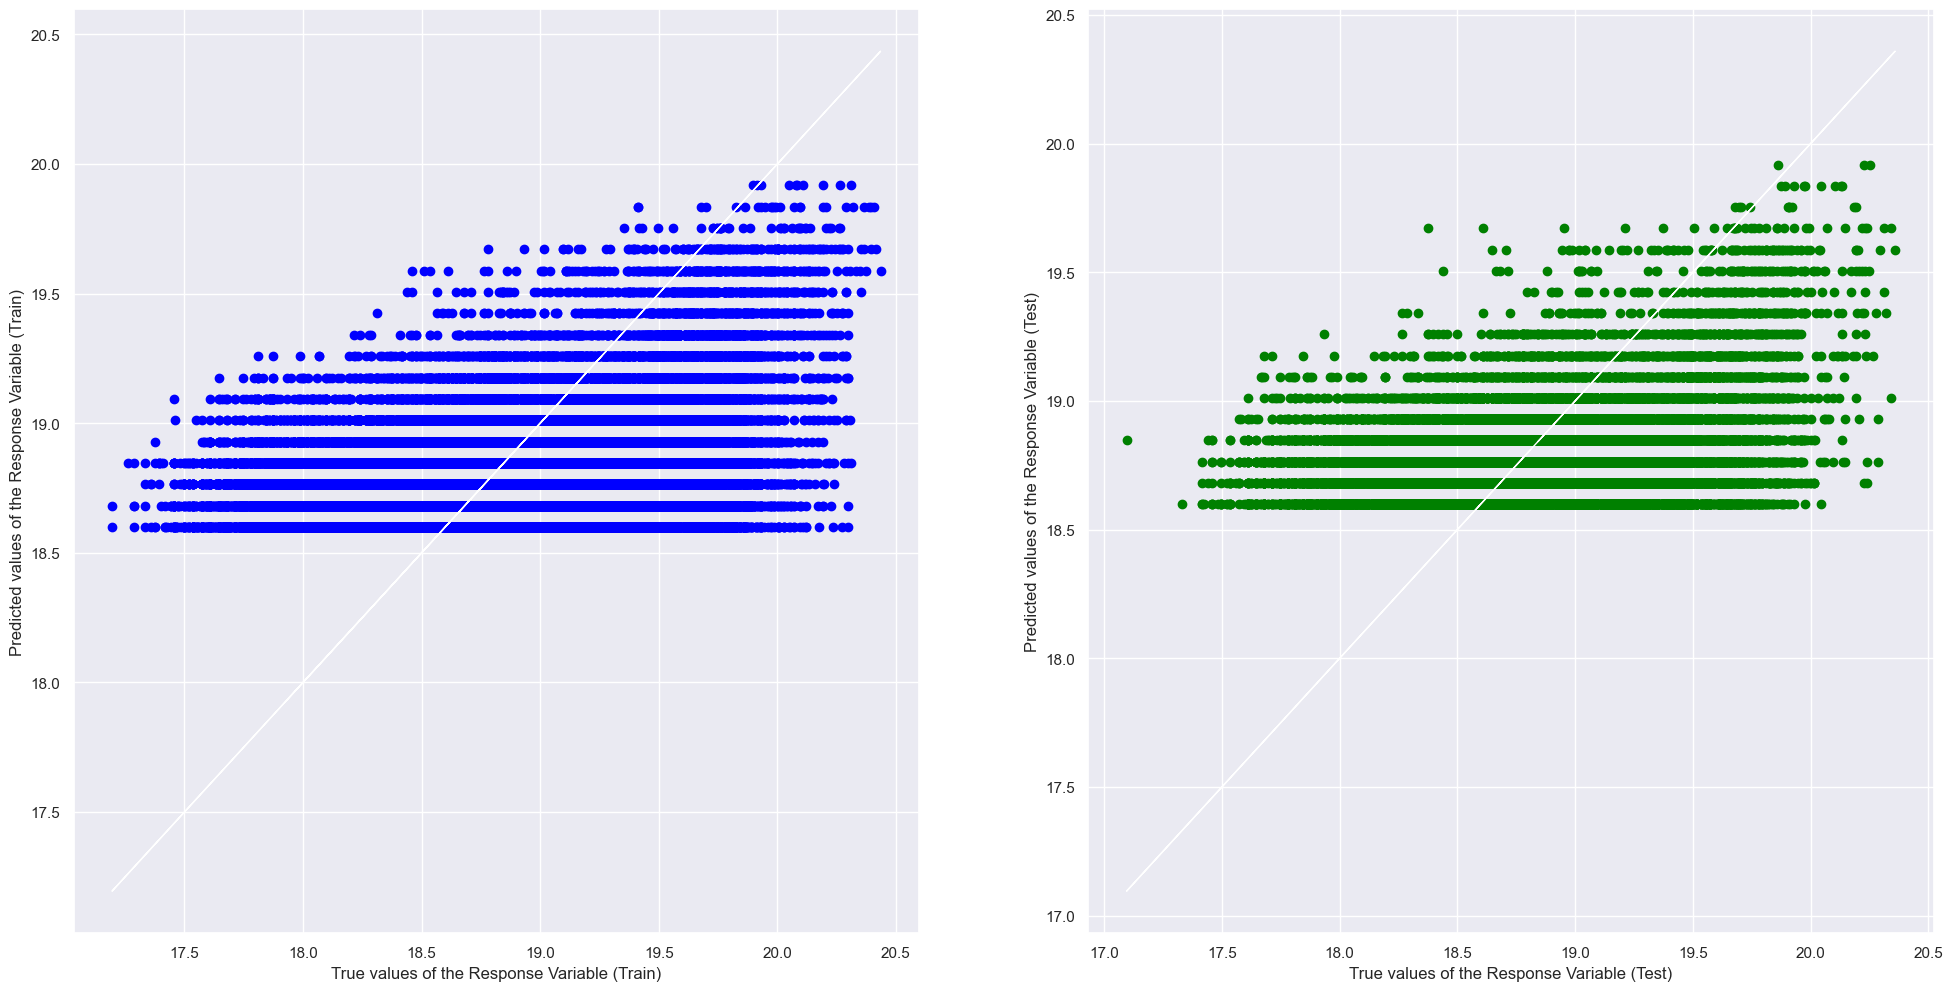

In [23]:
# Log of price against story range
price = pd.DataFrame(logPrice)   # Response
stor = pd.DataFrame(story)         # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(stor, price, test_size = 0.2)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

<AxesSubplot:>

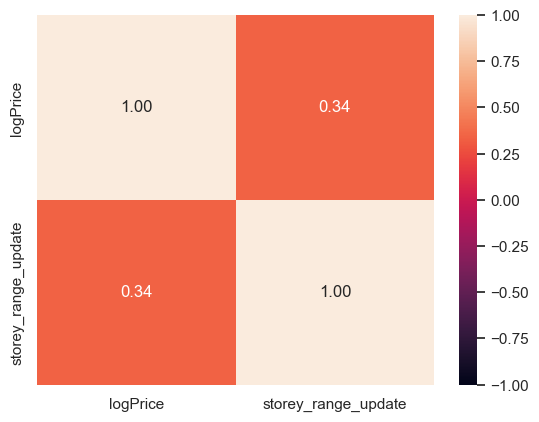

In [24]:
# Create a joint dataframe by concatenating the two variables
priceStoryDF = pd.concat([price, stor], axis = 1).reindex(price.index)
# Calculate the correlation between the two columns/variables
sb.heatmap(priceStoryDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

We can see from correlation heatmaps, ExplainedVariances and MeanSquared Errors that the variable 
with the strongest correlation to resale price is floor_area_sqm, followed by the age of the flat and 
lastly the storey range.

For floor_area_sqm, it has a 0.61 correlation with resale price which is not surprising. High Explained Variance 
and low Mean Squared Error.
For age of flat, there is a negative correlation showing that with the increase in age (decrease in lease time)
the price of the flat drops. 
For storey range, it is the least correlated and the most MeanSquared Error, showing the least correlation.

Both age of flat and storey range do not have high Explained Variances showing less correlation
Let us try Multi-Variate Regression, combining the 3 predictors.

Intercept of Regression 	: b =  [17.48957044]
Coefficients of Regression 	: a =  [[-0.00728943  0.06997901  0.01275152]]

            Predictors  Coefficients
0                  age     -0.007289
1  storey_range_update      0.069979
2       floor_area_sqm      0.012752



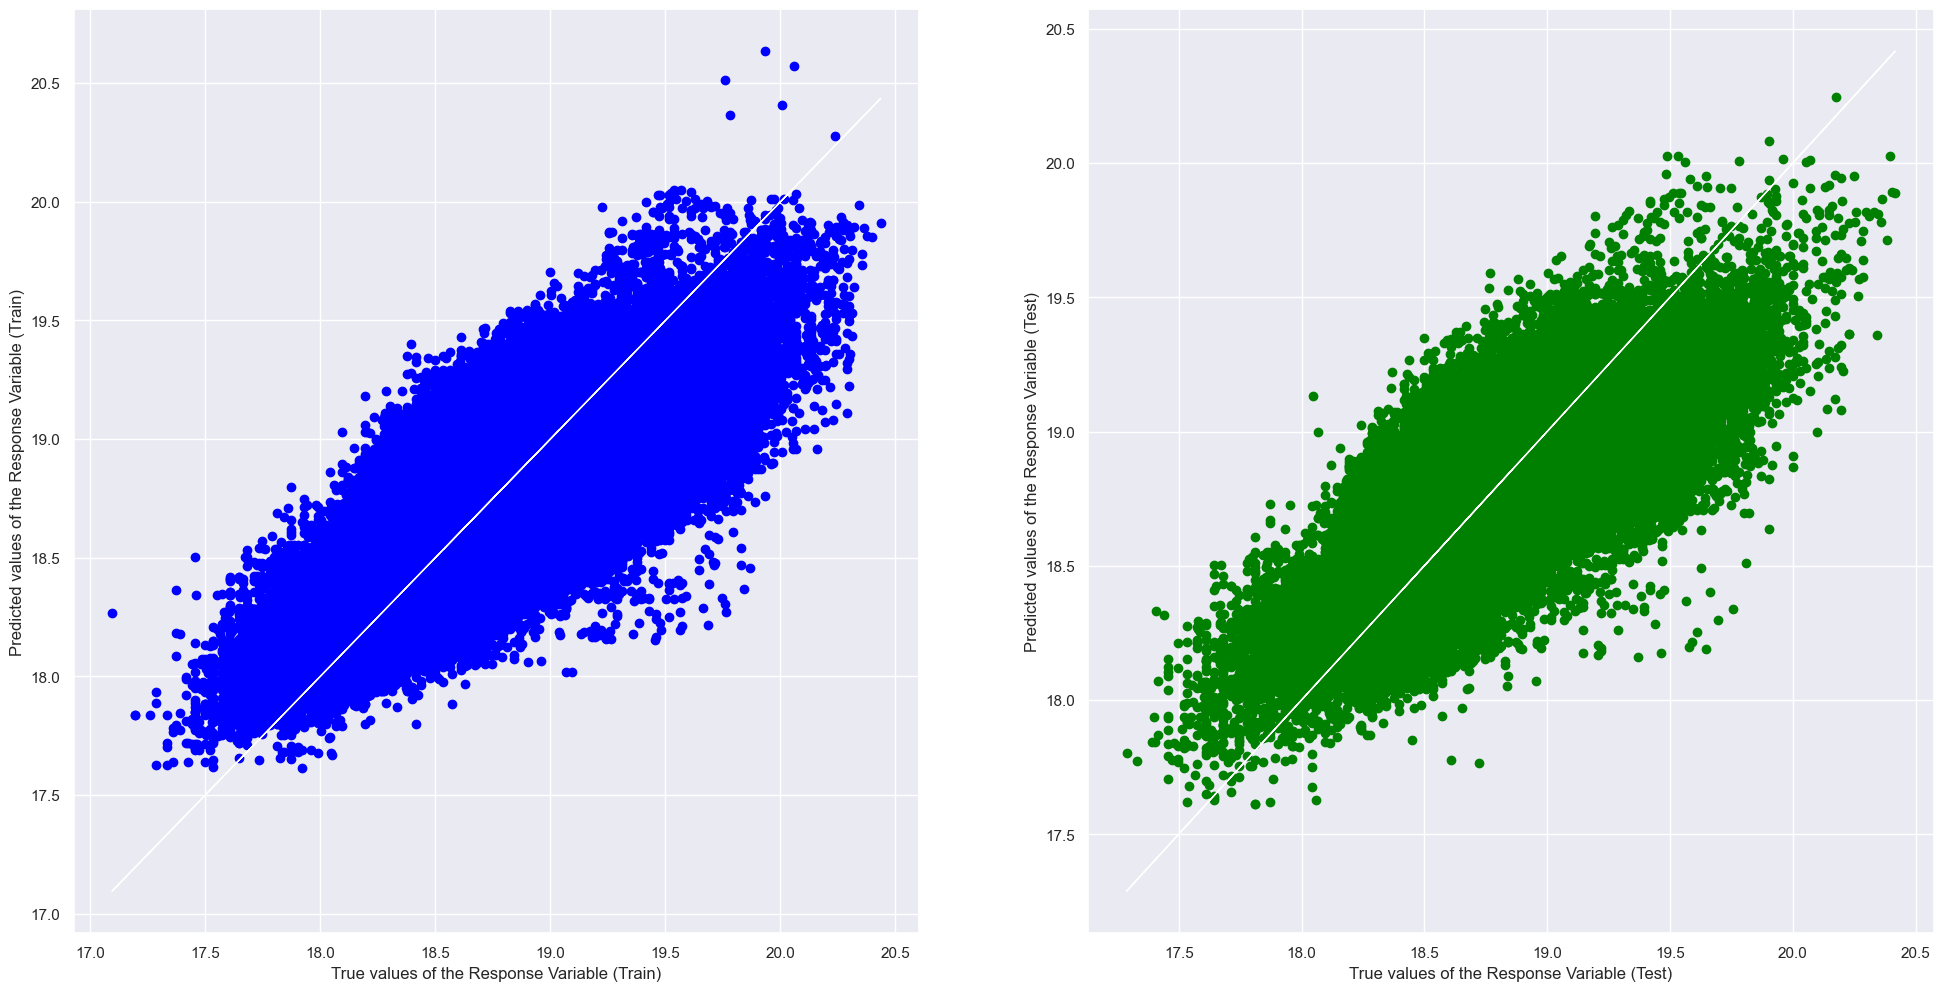

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5980367202112813
Mean Squared Error (MSE) 	: 0.09352683065141837

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5943862929650641
Mean Squared Error (MSE) 	: 0.09297358156378502



In [25]:
# Muti-Variate Regression using age of flat, storey_range_update and floor_area_sqm
# Extract Response and Predictors
y = pd.DataFrame(logPrice)
frames = [ageFlat, story, df['floor_area_sqm']]
X = pd.concat(frames,axis = 1, join = 'inner')

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

MultiVariate Regression is the most accurate as the MeanSquared Error is the smallest and the ExplainedVariance 
is the largest amongst the other linear regressions that we did. 
To test this regression model lets do a prediction test

In [26]:
#Adding ageFlat and story to df and making it a new df2 so that we can do predictions
frames2 = [ageFlat, story, df]
df2 = pd.concat(frames2,axis = 1, join = 'inner')
display(df2)

,age,storey_range_update,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,Longitude,Latitude
0,38,4,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10 Singapore,103.856785,1.369941
1,39,1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,108 ANG MO KIO AVE 4 Singapore,103.839917,1.379242
2,37,1,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,602 ANG MO KIO AVE 5 Singapore,103.835425,1.380760
3,37,2,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,465 ANG MO KIO AVE 10 Singapore,103.857175,1.366223
4,37,1,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,601 ANG MO KIO AVE 5 Singapore,103.835076,1.380987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145970,35,1,2023-01-01,YISHUN,EXECUTIVE,344,YISHUN AVE 11,01 TO 03,145.0,Maisonette,1988,64 years 07 months,755000.0,344 YISHUN AVE 11 Singapore,103.842415,1.426760
145971,35,4,2023-01-01,YISHUN,EXECUTIVE,387,YISHUN RING RD,10 TO 12,145.0,Apartment,1988,64 years 06 months,770000.0,387 YISHUN RING RD Singapore,103.847169,1.429503
145972,35,2,2023-01-01,YISHUN,EXECUTIVE,328,YISHUN RING RD,04 TO 06,145.0,Apartment,1988,64 years 05 months,750000.0,328 YISHUN RING RD Singapore,103.846240,1.425987
145973,37,4,2023-01-01,YISHUN,EXECUTIVE,724,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,62 years 06 months,780000.0,724 YISHUN ST 71 Singapore,103.829864,1.426465


In [27]:
#To test predictions, we can take 2 towns, Ang Mo Kio and Yishun
data_pred = df2[df2["town"].isin(["ANG MO KIO", "YISHUN"])] 
data_pred

,age,storey_range_update,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,Longitude,Latitude
0,38,4,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10 Singapore,103.856785,1.369941
1,39,1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,108 ANG MO KIO AVE 4 Singapore,103.839917,1.379242
2,37,1,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,602 ANG MO KIO AVE 5 Singapore,103.835425,1.380760
3,37,2,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,465 ANG MO KIO AVE 10 Singapore,103.857175,1.366223
4,37,1,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,601 ANG MO KIO AVE 5 Singapore,103.835076,1.380987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145970,35,1,2023-01-01,YISHUN,EXECUTIVE,344,YISHUN AVE 11,01 TO 03,145.0,Maisonette,1988,64 years 07 months,755000.0,344 YISHUN AVE 11 Singapore,103.842415,1.426760
145971,35,4,2023-01-01,YISHUN,EXECUTIVE,387,YISHUN RING RD,10 TO 12,145.0,Apartment,1988,64 years 06 months,770000.0,387 YISHUN RING RD Singapore,103.847169,1.429503
145972,35,2,2023-01-01,YISHUN,EXECUTIVE,328,YISHUN RING RD,04 TO 06,145.0,Apartment,1988,64 years 05 months,750000.0,328 YISHUN RING RD Singapore,103.846240,1.425987
145973,37,4,2023-01-01,YISHUN,EXECUTIVE,724,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,62 years 06 months,780000.0,724 YISHUN ST 71 Singapore,103.829864,1.426465


In [28]:
# Extract Predictors for Prediction
predictors = ["age", "storey_range_update", "floor_area_sqm"]
X_pred = pd.DataFrame(data_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = linreg.predict(X_pred)
y_pred = 2**(y_pred) #To undo the logarithmn 
y_pred

array([[272058.09951767],
       [286785.74248645],
       [289698.48782197],
       ...,
       [612083.58868307],
       [673584.70767789],
       [863364.63705671]])

In [29]:
# Summarize the Actuals, Predictions and Errors
y_pred = pd.DataFrame(y_pred, columns = ["PredTotal"], index = data_pred.index)
data_acc = pd.concat([data_pred[["town", "resale_price"]], y_pred], axis = 1)

y_errs = 100 * abs(data_acc["resale_price"] - data_acc["PredTotal"]) / data_acc["resale_price"]
y_errs = pd.DataFrame(y_errs, columns = ["Error"], index = data_pred.index)
data_acc = pd.concat([data_acc, y_errs], axis = 1)

data_acc

,town,resale_price,PredTotal,Error
0,ANG MO KIO,232000.0,272058.099518,17.266422
1,ANG MO KIO,250000.0,286785.742486,14.714297
2,ANG MO KIO,262000.0,289698.487822,10.571942
3,ANG MO KIO,265000.0,306796.641503,15.772318
4,ANG MO KIO,265000.0,289698.487822,9.320184
...,...,...,...,...
145970,YISHUN,755000.0,583102.566370,22.767872
145971,YISHUN,770000.0,674438.416519,12.410595
145972,YISHUN,750000.0,612083.588683,18.388855
145973,YISHUN,780000.0,673584.707678,13.642986


In [30]:
data_acc["Error"].describe()

count    16088.000000
mean        15.054881
std         10.347168
min          0.000957
25%          6.888989
50%         13.522994
75%         21.341902
max         89.675536
Name: Error, dtype: float64

From above we can see that the error is about 15% for the mean, and it deviates 10%.
The Multi-Variate linear regression managed to give us close estimates to the actual resale price of the flat.
We did not use Longitude and Latitude values and we did not use Flat Model, which may have allowed for better
predictions of the resale price of the flat. 

In [31]:
def errorPrediction(data_pred):
    # Extract Predictors for Prediction
    predictors = ["age", "storey_range_update", "floor_area_sqm"]
    X_pred = pd.DataFrame(data_pred[predictors])

    # Predict Response corresponding to Predictors
    y_pred = linreg.predict(X_pred)
    y_pred = 2**(y_pred) #To undo the logarithmn 

    # Summarize the Actuals, Predictions and Errors
    y_pred = pd.DataFrame(y_pred, columns = ["PredTotal"], index = data_pred.index)
    data_acc = pd.concat([data_pred[["town", "resale_price"]], y_pred], axis = 1)

    y_errs = 100 * abs(data_acc["resale_price"] - data_acc["PredTotal"]) / data_acc["resale_price"]
    y_errs = pd.DataFrame(y_errs, columns = ["Error"], index = data_pred.index)
    data_acc = pd.concat([data_acc, y_errs], axis = 1)

    display(data_acc)
    return data_acc

In [32]:
data_pred = df2[df2["town"].isin(["BISHAN", "BEDOK", "JURONG WEST"])] 
data_error = errorPrediction(data_pred)
data_error['Error'].describe()

,town,resale_price,PredTotal,Error
56,BEDOK,238000.0,247841.683108,4.135161
57,BEDOK,272000.0,306796.641503,12.792883
58,BEDOK,278000.0,294428.873996,5.909667
59,BEDOK,280000.0,292270.389734,4.382282
60,BEDOK,280000.0,264521.003526,5.528213
...,...,...,...,...
144585,JURONG WEST,708000.0,683522.223761,3.457313
144586,JURONG WEST,705000.0,683522.223761,3.046493
144587,JURONG WEST,680000.0,645428.690635,5.084016
144588,JURONG WEST,800000.0,720749.221789,9.906347


count    20345.000000
mean        17.347096
std         12.889472
min          0.004029
25%          6.945787
50%         14.721545
75%         25.366838
max        106.262158
Name: Error, dtype: float64

In [33]:
data_pred = df2[df2["town"].isin(["CLEMENTI"])] 
data_error = errorPrediction(data_pred)
data_error['Error'].describe()

,town,resale_price,PredTotal,Error
355,CLEMENTI,263800.0,308350.698741,16.888059
356,CLEMENTI,270000.0,308350.698741,14.203962
357,CLEMENTI,280000.0,304096.912428,8.606040
358,CLEMENTI,290000.0,302564.293855,4.332515
359,CLEMENTI,326000.0,308350.698741,5.413896
...,...,...,...,...
144188,CLEMENTI,898000.0,602867.315006,32.865555
144189,CLEMENTI,950000.0,619075.331801,34.834176
144190,CLEMENTI,940000.0,682142.429900,27.431656
144191,CLEMENTI,1025000.0,608227.872657,40.660695


count    3340.000000
mean       16.980853
std        10.796259
min         0.000469
25%         8.037008
50%        15.855639
75%        24.564009
max        47.922993
Name: Error, dtype: float64

In [34]:
data_pred = df2[df2["town"].isin(df2["town"])] 
data_error = errorPrediction(data_pred)
data_error['Error'].describe()

,town,resale_price,PredTotal,Error
0,ANG MO KIO,232000.0,272058.099518,17.266422
1,ANG MO KIO,250000.0,286785.742486,14.714297
2,ANG MO KIO,262000.0,289698.487822,10.571942
3,ANG MO KIO,265000.0,306796.641503,15.772318
4,ANG MO KIO,265000.0,289698.487822,9.320184
...,...,...,...,...
145970,YISHUN,755000.0,583102.566370,22.767872
145971,YISHUN,770000.0,674438.416519,12.410595
145972,YISHUN,750000.0,612083.588683,18.388855
145973,YISHUN,780000.0,673584.707678,13.642986


count    145975.000000
mean         17.053875
std          12.469873
min           0.000287
25%           7.036280
50%          14.636330
75%          24.856037
max         125.259704
Name: Error, dtype: float64

The error increases drastically when compared with many locations, lets take a look at one location.

In [35]:
#Adding LogPrice into df3 and testing a multivariate Regression with one town
frames3 = [logPrice, df2]
df3 = pd.concat(frames3,axis = 1, join = 'inner')
data_pred = df3[df3["town"].isin(["CLEMENTI"])] 

Intercept of Regression 	: b =  17.806911760092056
Coefficients of Regression 	: a =  [-0.01859668  0.0366485   0.01700993]



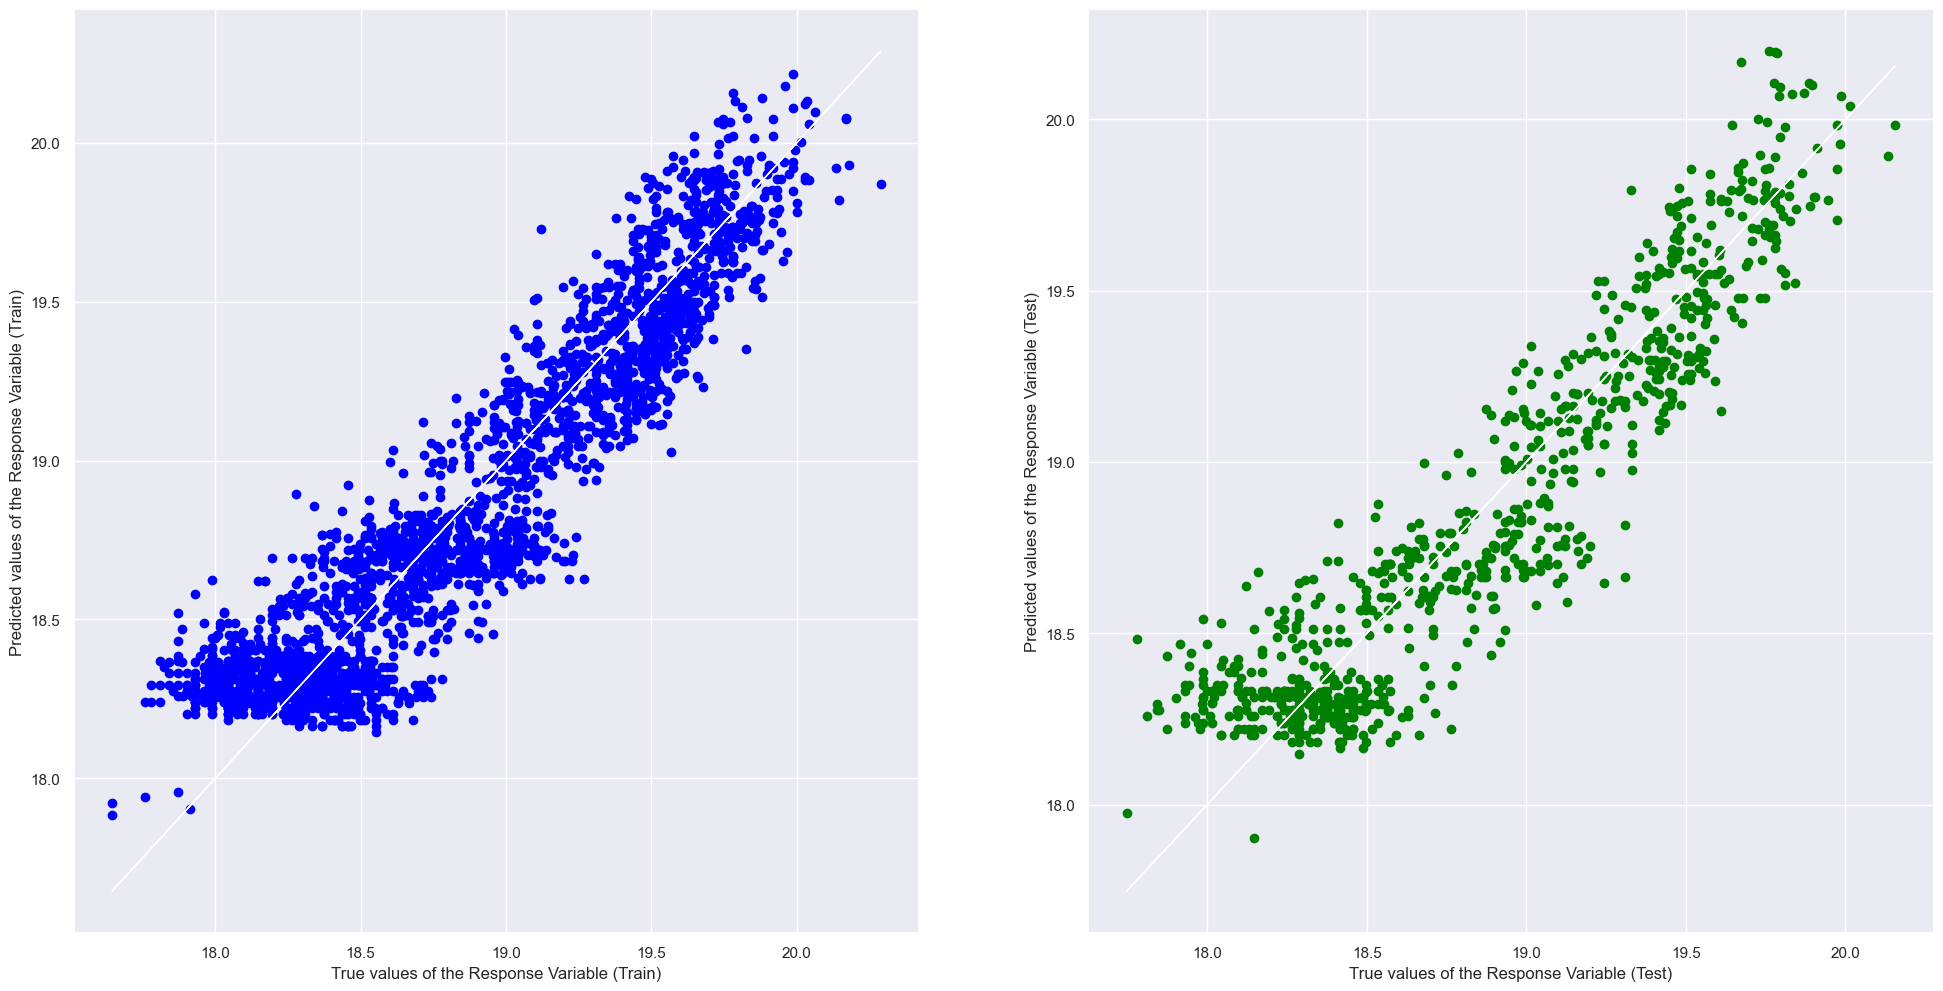

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8715224257044897
Mean Squared Error (MSE) 	: 0.04139135340260616

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8651698873961029
Mean Squared Error (MSE) 	: 0.04279934761540985



In [36]:
# Muti-Variate Regression using age of flat, storey_range_update and floor_area_sqm
# Extract Response and Predictors
y = data_pred['logPrice']
frames = ['age', 'storey_range_update', 'floor_area_sqm']
X = pd.DataFrame(data_pred[frames])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

In [37]:
data_pred = df3[df3["town"].isin(["CLEMENTI"])] 
data_error = errorPrediction(data_pred)
data_error['Error'].describe()

,town,resale_price,PredTotal,Error
355,CLEMENTI,263800.0,338173.450078,28.193120
356,CLEMENTI,270000.0,338173.450078,25.249426
357,CLEMENTI,280000.0,329929.273692,17.831883
358,CLEMENTI,290000.0,325703.701179,12.311621
359,CLEMENTI,326000.0,338173.450078,3.734187
...,...,...,...,...
144188,CLEMENTI,898000.0,782558.110314,12.855444
144189,CLEMENTI,950000.0,846414.699879,10.903716
144190,CLEMENTI,940000.0,890528.437529,5.262932
144191,CLEMENTI,1025000.0,826689.072826,19.347408


count    3340.000000
mean       11.613850
std         8.644242
min         0.013229
25%         4.887710
50%         9.938423
75%        16.571173
max        62.933052
Name: Error, dtype: float64

When contrained to a specific locality, the Explained Variance and Mean Squared Error is much better than when done over the whole of Singapore. If we were to improve the model, taking into account the location of the resale flats in respect to important and centralised areas in Singapore may yield better results. 

Overall, the hypothesis that the resale price of a flat is influenced by factors such as floor area and the age of the flat is largely true, with MultiVariate regression and predictive error to back up this claim. If one is to determine the price of a flat, the best variable that can do so would be the floor area of the flat. The combination of age, storey range as well as floor area is by far the best predictors and should be used to find the best flat for its cost.

We did not look into the location of the flat, which may have yielded a better correlation than floor area and may be more effective in predicting resale price. As shown above, when taking eliminating the different locations, the model is much more effective in predicting the resale price of the flat. 